# Regressão logística

Estimar a probabilidade de um perquisador possuir uma filiação internacional, com base nas seguintes variáveis disponíveis:

* DuracaoDoutorado
* Genero 
* Publicacoes 
* IdadeAcademica 
* ExclusividadeDoutorado

In [5]:
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [18]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = 'dataset_filiacoes.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

# Aplica a regressão logística para um conjunto de varíaveis determinadas
def logistic_regression(x_independents: DataFrame, y_dependent: DataFrame, balanced=False):

    print(f'Balanced: {balanced}')
    print(y_dependent.value_counts())

    # 40% dos dados serão para teste e 60% para treino
    x_train, x_test, y_train, y_test = train_test_split(x_independents, y_dependent, test_size=0.4, random_state=42)

    model = LogisticRegression(class_weight= 'balanced' if balanced else None)
    model.fit(x_train, y_train)

    # Fazendo predições
    y_pred = model.predict(x_test)

    # Acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print("Acurácia:", accuracy)

    # Gerando e plotando a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Previsão")
    plt.ylabel("Valor Real")
    plt.title("Matriz de Confusão")
    plt.show()

    # Relatório de Classificação
    class_report = classification_report(y_test, y_pred)
    print("Report:\n", class_report)

Balanced: True
HistoricoInternacional
0    101940
1     19700
Name: count, dtype: int64
Acurácia: 0.5842239394935876


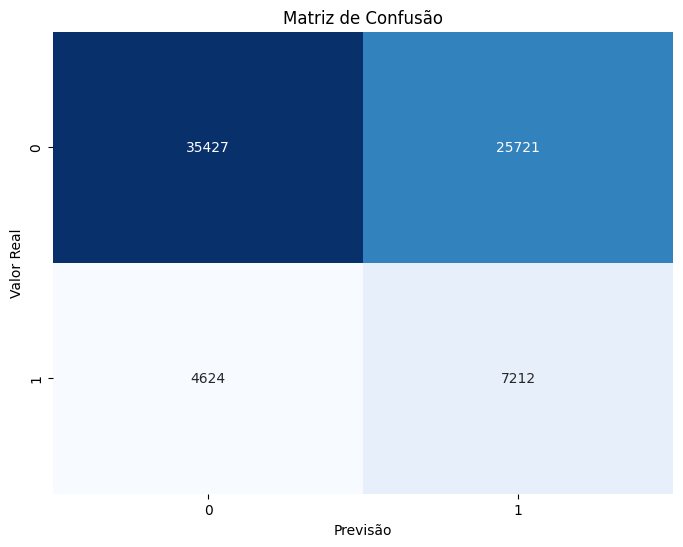

Report:
               precision    recall  f1-score   support

           0       0.88      0.58      0.70     61148
           1       0.22      0.61      0.32     11836

    accuracy                           0.58     72984
   macro avg       0.55      0.59      0.51     72984
weighted avg       0.78      0.58      0.64     72984

Balanced: False
HistoricoInternacional
0    101940
1     19700
Name: count, dtype: int64
Acurácia: 0.8375260331031459


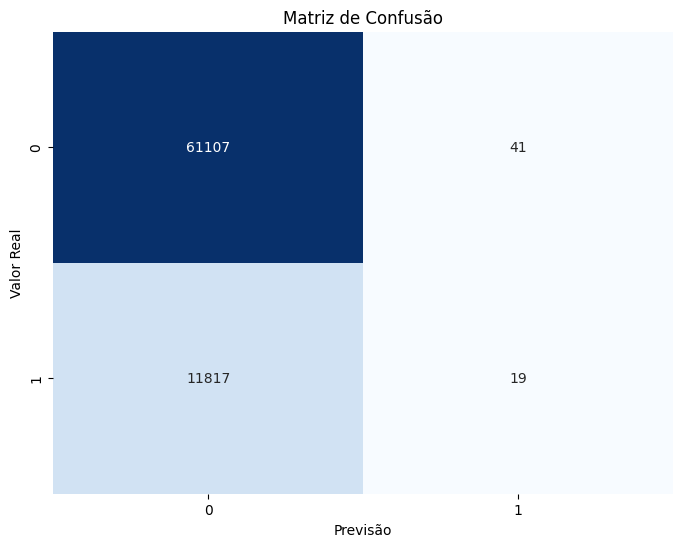

Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91     61148
           1       0.32      0.00      0.00     11836

    accuracy                           0.84     72984
   macro avg       0.58      0.50      0.46     72984
weighted avg       0.75      0.84      0.76     72984



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis independentes
x_independents = dataset[['DuracaoDoutorado',
             'Genero',
             'ExclusividadeDoutorado',
             'Publicacoes',
             'IdadeAcademica']]

# Variável dependente
y_dependent = dataset['HistoricoInternacional']

logistic_regression(x_independents, y_dependent, balanced=True)
logistic_regression(x_independents, y_dependent)

## Estimando gênero

Estimar o gênero do pesquisador(a) com base nas seguintes variáveis disponíveis:
* DuracaoDoutorado
* ExclusividadeDoutorado
* Publicacoes
* IdadeAcademica
* HistoricoInternacional

Balanced: False
Genero
0.0    61953
1.0    59687
Name: count, dtype: int64
Acurácia: 0.5396251233146991


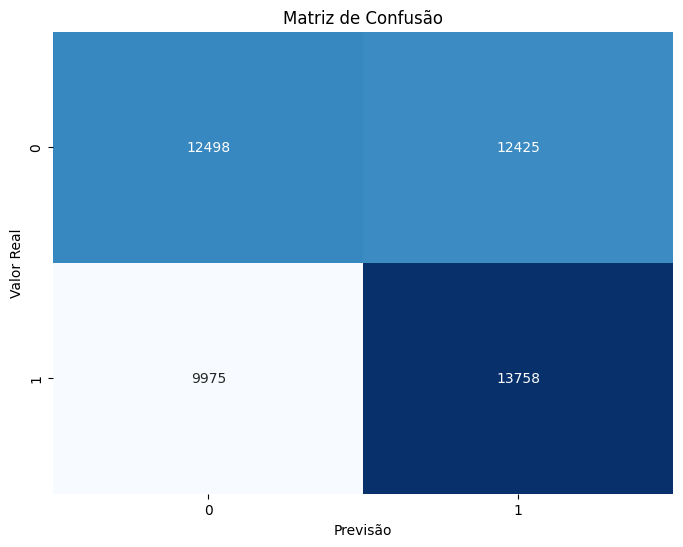

Report:
               precision    recall  f1-score   support

         0.0       0.56      0.50      0.53     24923
         1.0       0.53      0.58      0.55     23733

    accuracy                           0.54     48656
   macro avg       0.54      0.54      0.54     48656
weighted avg       0.54      0.54      0.54     48656



In [19]:
x_independents = dataset[['DuracaoDoutorado',
                    'ExclusividadeDoutorado',
                    'Publicacoes',
                    'IdadeAcademica',
                    'HistoricoInternacional']]
y_dependent = dataset['Genero']

logistic_regression(x_independents, y_dependent)

## Estimando exclusividade de área no doutorado

Estimar ExclusividadeDoutorado com base nas seguintes variáveis disponíveis:
* DuracaoDoutorado
* Genero
* Publicacoes
* IdadeAcademica
* HistoricoInternacional

Balanced: False
ExclusividadeDoutorado
1.0    73714
0.0    47926
Name: count, dtype: int64
Acurácia: 0.6171489641565274


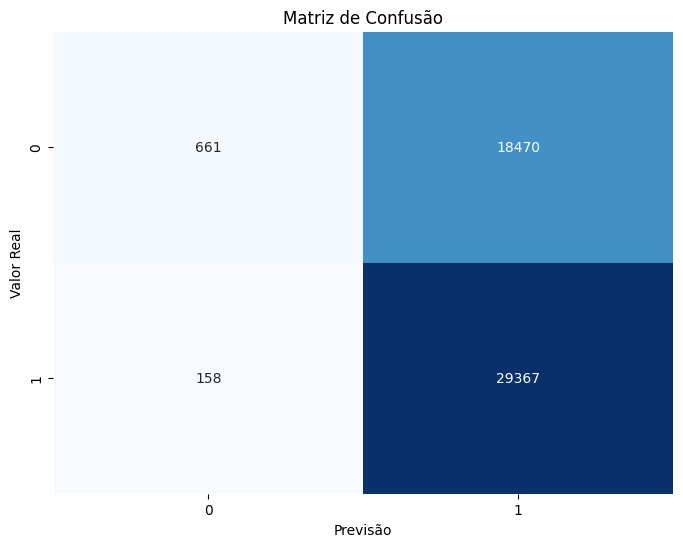

Report:
               precision    recall  f1-score   support

         0.0       0.81      0.03      0.07     19131
         1.0       0.61      0.99      0.76     29525

    accuracy                           0.62     48656
   macro avg       0.71      0.51      0.41     48656
weighted avg       0.69      0.62      0.49     48656

Balanced: True
ExclusividadeDoutorado
1.0    73714
0.0    47926
Name: count, dtype: int64
Acurácia: 0.5293694508385399


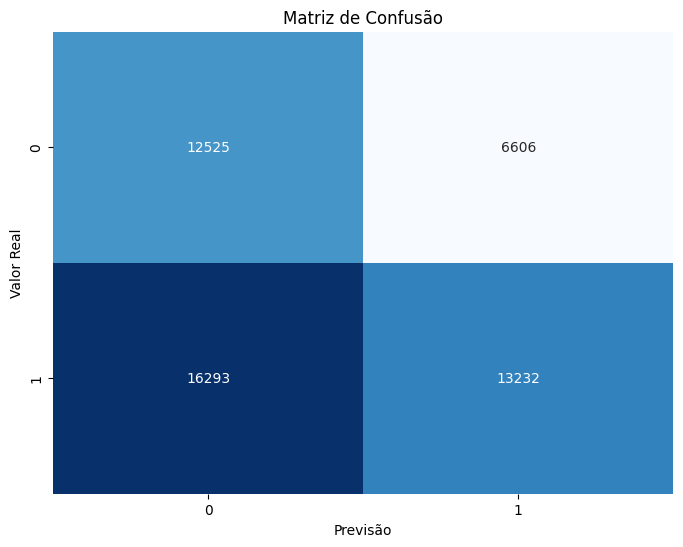

Report:
               precision    recall  f1-score   support

         0.0       0.43      0.65      0.52     19131
         1.0       0.67      0.45      0.54     29525

    accuracy                           0.53     48656
   macro avg       0.55      0.55      0.53     48656
weighted avg       0.58      0.53      0.53     48656



In [21]:
x_independents = dataset[['DuracaoDoutorado',
             'Genero',
             'Publicacoes',
             'IdadeAcademica',
             'HistoricoInternacional']]
y_dependent = dataset['ExclusividadeDoutorado']

logistic_regression(x_independents, y_dependent)
logistic_regression(x_independents, y_dependent, balanced=True)